# 数据可视化作业题目

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [46]:
data1 = sns.load_dataset("flights")
data1.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### 年度乘客总量变化

#### matplotlib方法

In [45]:
#声明折线图绘制方法
def lineplot(x_data, y_data, x_label, y_label, title):
    # 创建绘图对象
    _, ax = plt.subplots()

    # 绘制拟合曲线，lw=linewidth，alpha=transparancy
    ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)

    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

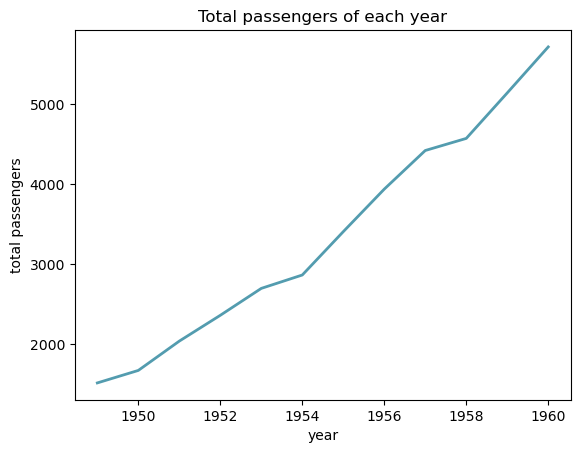

In [42]:
#将数据按照year分组求和，重置index
data1_y = data1.groupby('year').sum('passengers').reset_index()
#以年份为x，以年总乘客数为y，绘制
lineplot(x_data=data1_y['year'],
         y_data=data1_y['passengers'],
         err
         x_label= 'year',
         y_label= 'total passengers',
         title= 'Total passengers of each year'
        )

#### 解释：乘客量逐年上升

### 乘客量的月份分布

In [56]:
data1_m = data1.groupby('month').agg(['mean','std']).reset_index()
data1_m.head()

month    year            passengers            
           mean       std        mean         std
0   Jan  1954.5  3.605551  241.750000  101.032960
1   Feb  1954.5  3.605551  235.000000   89.619397
2   Mar  1954.5  3.605551  270.166667  100.559194
3   Apr  1954.5  3.605551  267.083333  107.374839
4   May  1954.5  3.605551  271.833333  114.739890

### matplotlib方法

In [58]:
#声明柱形图绘制的方法
def barplot(x_data, y_data, error_data, x_label, y_label, title):
    _, ax = plt.subplots()
    # 柱状图（注：x_data是不能接受str或者float的）
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    # 绘制方差
    # ls='none'去掉bar之间的连线
    ax.errorbar(x_data, y_data, yerr = error_data, color = '#297083', ls = 'none', lw = 2.5) # lw线宽
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

  month    year            passengers            
           mean       std        mean         std
0   Jan  1954.5  3.605551  241.750000  101.032960
1   Feb  1954.5  3.605551  235.000000   89.619397
2   Mar  1954.5  3.605551  270.166667  100.559194
3   Apr  1954.5  3.605551  267.083333  107.374839
4   May  1954.5  3.605551  271.833333  114.739890


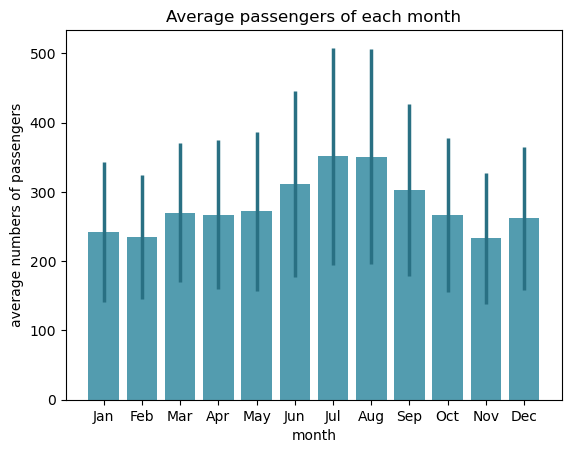

In [59]:
#将数据按照month分组求和，重置index
data1_m = data1.groupby('month').agg(['mean','std']).reset_index()
print(data1_m.head())
#以月份为x，以平均乘客数为y，绘制带有标准差的柱形图
barplot(x_data=data1_m['month'],
        y_data=data1_m['passengers']['mean'],
        error_data=data1_m['passengers']['std'],
        x_label= 'month',
        y_label= 'average numbers of passengers',
        title= 'Average passengers of each month'
        )

#### 解释：7-8月为乘飞机出行的高峰，但各月数据差异并不是特别巨大

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data2 = sns.load_dataset("iris")
print(data2.head())
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类
print(data2.groupby('species').sum())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             250.3        171.4          73.1         12.3
versicolor         296.8        138.5         213.0         66.3
virginica          329.4        148.7         277.6        101.3


### 萼片与花瓣的大小关系

#### matplotlib方法 

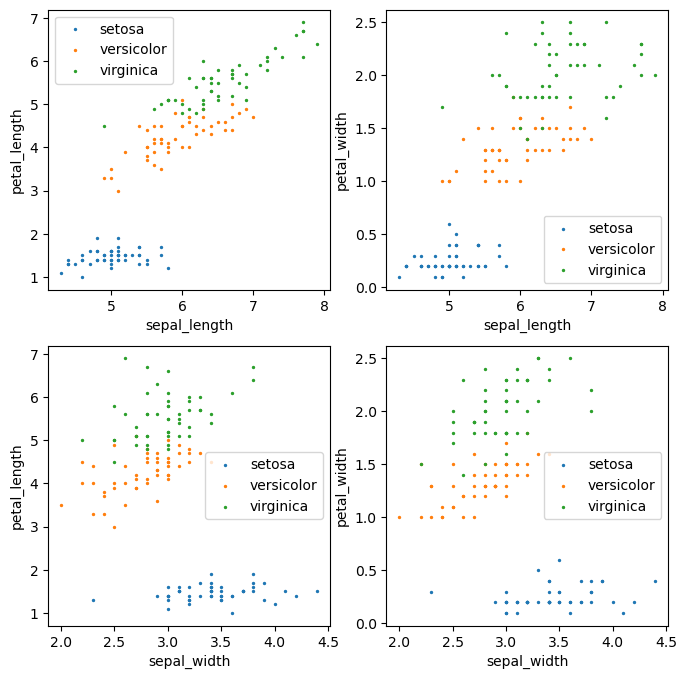

In [84]:
plt.figure(figsize=(8,8))
sepal = ['sepal_length','sepal_width']
petal = ['petal_length','petal_width']
species = ['setosa','versicolor','virginica']
print(data2.loc())
#声明2*2网格的散点图画法
def scatters_in_2x2grid(df,rloc,cloc,rgroup,cgroup,hname,hgroup):
    ax = plt.subplot2grid((2,2),(rloc,cloc),rowspan=1,colspan=1)
    for h in hgroup:
        ax.scatter(x = df[df[hname] == h][rgroup[rloc]],
                   y = df[df[hname] == h][cgroup[cloc]],
                   s = 2)
        ax.legend(hgroup)
    ax.set(xlabel = rgroup[rloc],
           ylabel = cgroup[cloc])
    
    return None

scatters_in_2x2grid(data2,
                    rloc = 0,
                    cloc = 0,
                    rgroup = sepal, 
                    cgroup = petal, 
                    hname= 'species', 
                    hgroup = species )
scatters_in_2x2grid(data2,
                    rloc = 0,
                    cloc = 1,
                    rgroup = sepal, 
                    cgroup = petal, 
                    hname= 'species', 
                    hgroup = species )
scatters_in_2x2grid(data2,
                    rloc = 1,
                    cloc = 0,
                    rgroup = sepal, 
                    cgroup = petal, 
                    hname= 'species', 
                    hgroup = species )
scatters_in_2x2grid(data2,
                    rloc = 1,
                    cloc = 1,
                    rgroup = sepal, 
                    cgroup = petal, 
                    hname= 'species', 
                    hgroup = species )

#### 解释:总体来看萼片长度与花瓣尺寸（包括长度和宽度）都有正向相关性，萼片宽度则与花瓣尺寸没有明显相关关系 

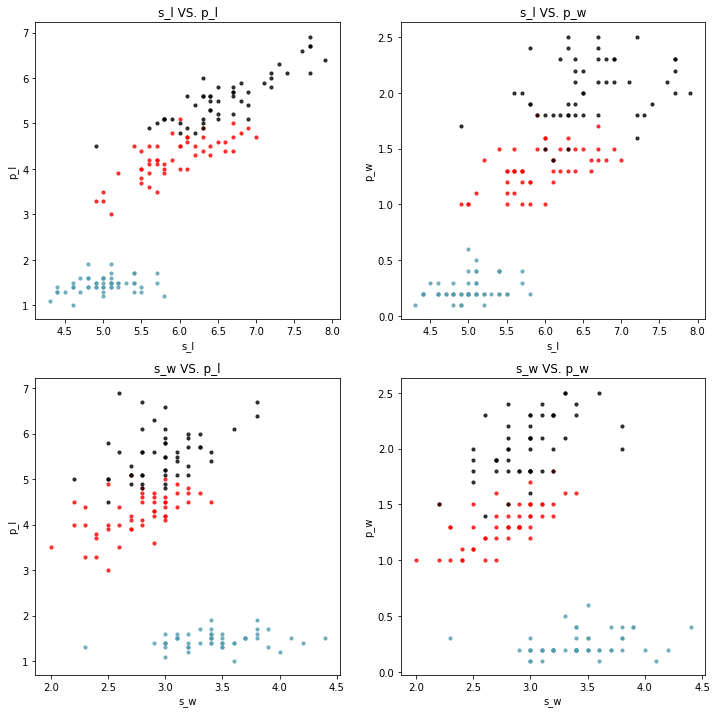

### 不同种类下萼片与花瓣的大小关系

#### matplotlib方法 

In [31]:
# 定义箱型图的绘制方法
def boxplot(x_data, y_data, base_color, median_color, x_label, y_label, title):
    _, ax = plt.subplots()

    # 设置样式
    ax.boxplot(y_data
               # 箱子是否颜色填充
               , patch_artist = True
               # 中位数线颜色
               , medianprops = {'color': base_color}
               # 箱子颜色设置，color：边框颜色，facecolor：填充颜色
               , boxprops = {'color': base_color, 'facecolor': median_color}
               # 猫须颜色whisker
               , whiskerprops = {'color': median_color}
               # 猫须界限颜色whisker cap
               , capprops = {'color': base_color})

    # 箱图与x_data保持一致
    ax.set_xticklabels(x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

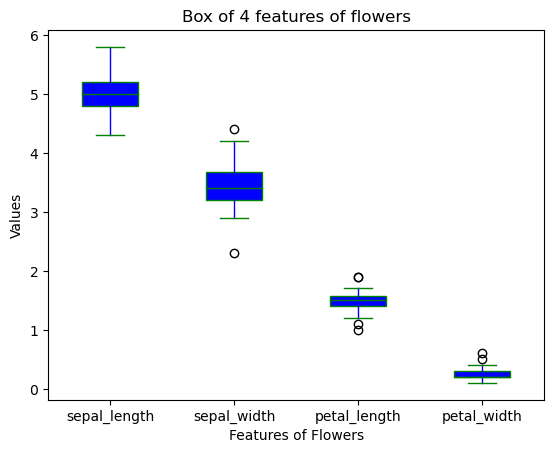

In [32]:
#获取变量名
data2_vars = data2.iloc[:,0:-1].columns.values
#定义物种名列表
species = ['setosa','versicolor','virginica']
#绘制箱式图（对第一个物种）
boxplot(x_data = data2_vars
        , y_data = data2[data2['species'] == species[0]][data2_vars] #ydata要求与xdata列数匹配，用了两步筛选
        , base_color = 'g'
        , median_color = 'b'
        , x_label = 'Features of Flowers'
        , y_label = 'Values'
        , title = 'Box of 4 features of flowers')

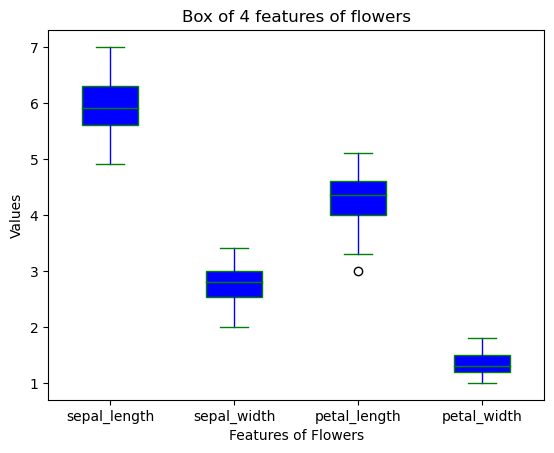

In [34]:
#绘制箱式图（对第2个物种）
boxplot(x_data = data2_vars
        , y_data = data2[data2['species'] == species[1]][data2_vars] #ydata要求与xdata列数匹配，用了两步筛选
        , base_color = 'g'
        , median_color = 'b'
        , y_label = 'Values'
        , x_label = 'Features of Flowers'
        , title = 'Box of 4 features of flowers')

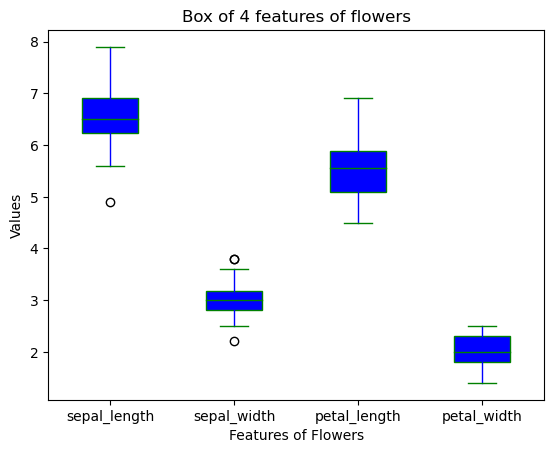

In [35]:
#绘制箱式图（对第3个物种）
boxplot(x_data = data2_vars
        , y_data = data2[data2['species'] == species[2]][data2_vars]
        , base_color = 'g'
        , median_color = 'b'
        , y_label = 'Values'
        , x_label = 'Features of Flowers'
        , title = 'Box of 4 features of flowers')

#### 解释：同一物种内表现出类似pattern，即萼片的长宽关系与花瓣的长宽关系相似

### 不同种类的萼片和花瓣大小分布

#### matplotlib方法 

In [65]:
#定义堆叠直方图画法
def overlaidx4_histogram(data,
                       color1,color2,color3,color4,
                       x_label, y_label, title):
    # 归一化数据区间，对齐两个直方图的bins
    max_nbins = 30
    data_range = [data.min().min(), data.max().max()]
    binwidth = (data_range[1] - data_range[0]) / max_nbins
    bins = np.arange(data_range[0], data_range[1] + binwidth, binwidth) # 生成直方图bins区间
    
    # Create the plot
    _, ax = plt.subplots()
    ax.hist(data.iloc[:,0], bins = bins, color = color1, alpha = 1, label = data.columns.values[0])
    ax.hist(data.iloc[:,1], bins = bins, color = color2, alpha = 0.75, label = data.columns.values[1])
    ax.hist(data.iloc[:,2], bins = bins, color = color3, alpha = 0.66, label = data.columns.values[2])
    ax.hist(data.iloc[:,3], bins = bins, color = color4, alpha = 0.5, label = data.columns.values[3])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'best')
    
#定义物种名列表
species = ['setosa','versicolor','virginica']

# data2.iloc[:,0:4][data2['species']==species[0]].min().min()

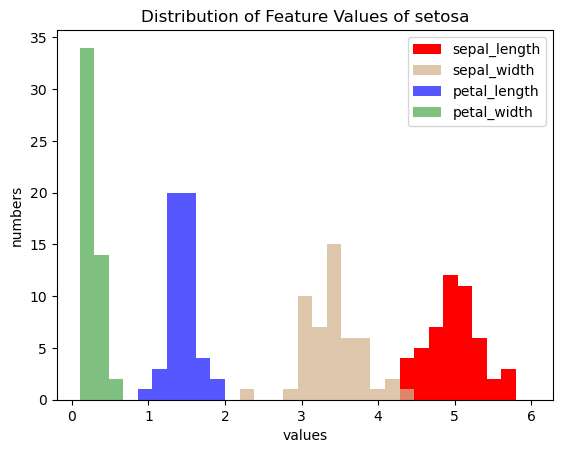

In [66]:
overlaidx4_histogram(data2.iloc[:,0:4][data2['species']==species[0]],
                    'r','tan','b','g',
                    'values','numbers','Distribution of Feature Values of '+species[0])

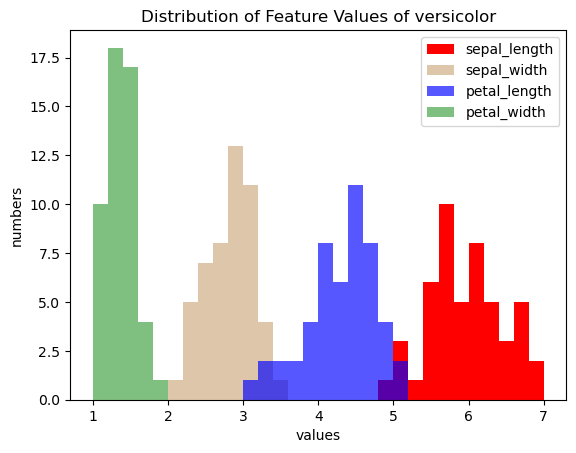

In [67]:
overlaidx4_histogram(data2.iloc[:,0:4][data2['species']==species[1]],
                    'r','tan','b','g',
                    'values','numbers','Distribution of Feature Values of '+species[1])

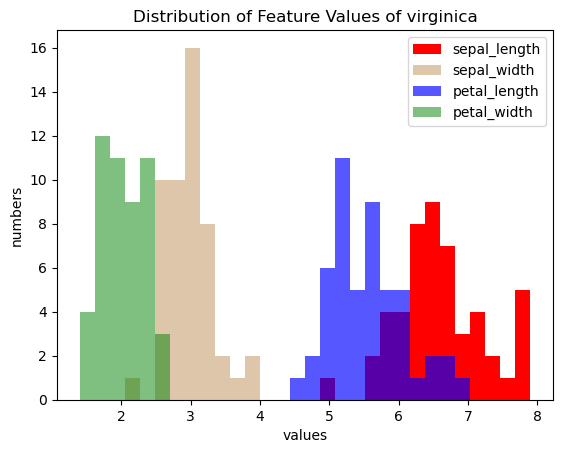

In [68]:
overlaidx4_histogram(data2.iloc[:,0:4][data2['species']==species[2]],
                    'r','tan','b','g',
                    'values','numbers','Distribution of Feature Values of '+species[2])

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

data3 = sns.load_dataset("tips")
data3.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 小费和总消费的关系 

#### matplotlib方法

In [2]:
# 包装一个散点图的函数便于复用
# 提供了已有ax的接口，可以叠加绘图
def scatterplot(x_data, y_data, x_label, y_label, title, ax = None):

    # 创建一个绘图对象
    if ax:
        pass
    else:
        fig, ax = plt.subplots()
    # 调用plt句柄画一个图，返回两个变量fig，ax，分别是figure和 axes的缩写。函数返回一个figure图像和一个子图ax的array列表。
    # 一个fig图里边会套好几个ax，而每个ax会负责当前坐标上的图。所以任何绘制的图形都是在ax上完成的；
    # 而设置整个画布，将是在fig上完成。
    
    # 不显示顶部和右侧的坐标线
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    # 设置数据x_data和y_data、点的大小s、点的颜色color和透明度alpha
    ax.scatter(x_data, y_data, s = 10, color = '#539caf', alpha = 0.75)

    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

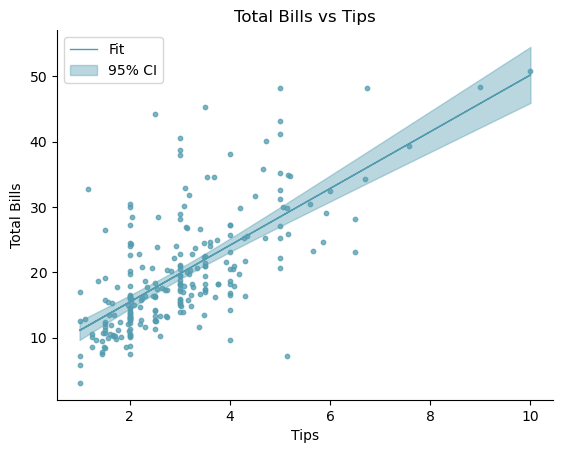

In [9]:
# 线性回归
# !pip install statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
x = sm.add_constant(data3['tip']) # 线性回归增加常数项
y = data3['total_bill']
regr = sm.OLS(y, x) # 普通最小二乘模型，ordinary least square model
res = regr.fit()

# 从模型获得拟合数据
st, data, ss2 = summary_table(res, alpha=0.05) # 置信水平alpha=5%，st数据汇总，data数据详情，ss2数据列名
fitted_values = data[:,2]

# 获得5%置信区间的上下界
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T

# 创建置信区间DataFrame，上下界
CI_df = pd.DataFrame(columns = ['x_data', 'low_CI', 'upper_CI'])
CI_df['x_data'] = data3['tip']
CI_df['low_CI'] = predict_mean_ci_low
CI_df['upper_CI'] = predict_mean_ci_upp
CI_df.sort_values('x_data', inplace = True) # 根据x_data进行排序

# 绘制置信区间
def lineplotCI(x_data, y_data, sorted_x, low_CI, upper_CI, x_label, y_label, title):
    # 创建绘图对象
    _, ax = plt.subplots()

    # 绘制预测曲线
    ax.plot(x_data, y_data, lw = 1, color = '#539caf', alpha = 1, label = 'Fit')
    # 绘制置信区间，顺序填充
    ax.fill_between(sorted_x, low_CI, upper_CI, color = '#539caf', alpha = 0.4, label = '95% CI')
    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    # 显示图例，配合label参数，loc=“best”自适应方式
    ax.legend(loc = 'best')
    return ax

# Call the function to create plot
ax_line = lineplotCI(x_data = data3['tip']
           , y_data = fitted_values
           , sorted_x = CI_df['x_data']
           , low_CI = CI_df['low_CI']
           , upper_CI = CI_df['upper_CI']
           , x_label = 'Tips'
           , y_label = 'Total Bills'
           , title = 'Line of Best Fit for Total Bills vs Tips')
scatterplot(x_data = data3['tip']
            , y_data = data3['total_bill']
            , x_label = 'Tips'
            , y_label = 'Total Bills'
            , title = 'Total Bills vs Tips'
            , ax = ax_line)

#### 解释：小费与总消费有着正相关关系

### 小费在性别上的差异

#### matplotlib方法 

In [27]:
feature_list = np.unique(data3['sex'])
new_df = pd.DataFrame(columns= feature_list)

In [5]:
#打包一个方法，将DataFrame整形为适用于boxplot的格式
def reshape_for_box( raw_data, dim, value_name):
    #获取所需维度列的所有可能值，作为特征列表
    feature_list = np.unique(raw_data[dim])
    #利用列表，每个元素为对应特征的数组
    #此处不能直接用dataframe，因为各数组间的索引是无相关的
    new_df = []
    for feature in feature_list:
        #从原dataframe中取出所需value，并以特征过滤
        new_df.append(raw_data[value_name][raw_data[dim] == feature].values)
    return feature_list , new_df

# 定义箱型图的绘制方法
def boxplot(x_data, y_data, base_color, median_color, x_label, y_label, title):
    _, ax = plt.subplots()

    # 设置样式
    ax.boxplot(y_data
               # 箱子是否颜色填充
               , patch_artist = True
               # 中位数线颜色
               , medianprops = {'color': base_color}
               # 箱子颜色设置，color：边框颜色，facecolor：填充颜色
               , boxprops = {'color': base_color, 'facecolor': median_color}
               # 猫须颜色whisker
               , whiskerprops = {'color': median_color}
               # 猫须界限颜色whisker cap
               , capprops = {'color': base_color})

    # 箱图与x_data保持一致
    ax.set_xticklabels(x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)


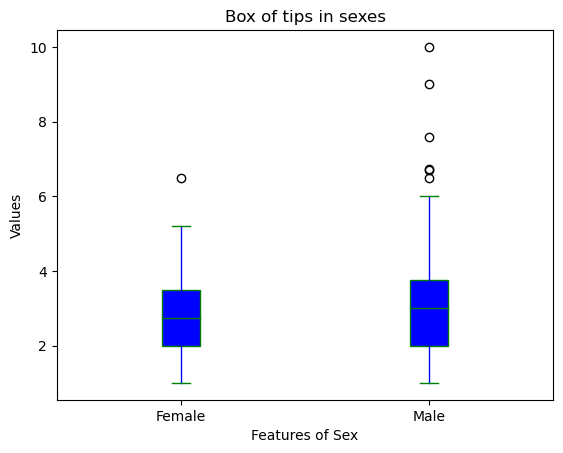

In [39]:
features, values = reshape_for_box(value_name = 'tip',
                                   dim = 'sex',
                                   raw_data = data3)

#绘制箱式图
boxplot(  x_data = features
        , y_data = values
        , base_color = 'g'
        , median_color = 'b'
        , x_label = 'Features of Sex'
        , y_label = 'Values'
        , title = 'Box of tips in sexes')

#### 解释：在性别上无显著差别

### 小费在抽烟与否上的差异

#### matplotlib方法 

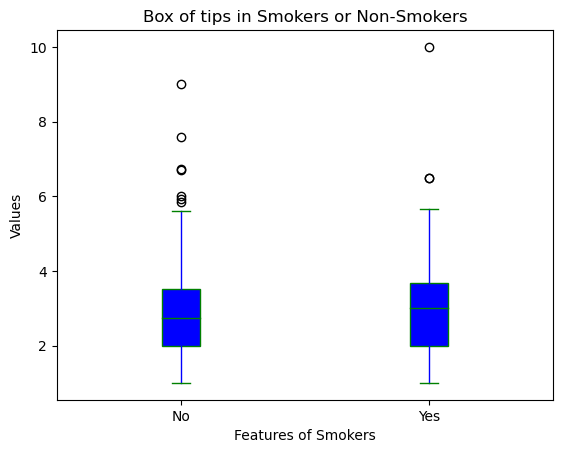

In [41]:
features, values = reshape_for_box(value_name = 'tip',
                                   dim = 'smoker',
                                   raw_data = data3)

#绘制箱式图
boxplot(  x_data = features
        , y_data = values
        , base_color = 'g'
        , median_color = 'b'
        , x_label = 'Features of Smokers'
        , y_label = 'Values'
        , title = 'Box of tips in Smokers or Non-Smokers')

#### 解释：在抽烟与否上无显著差别

### 小费在星期几上的差异

#### matplotlib方法 

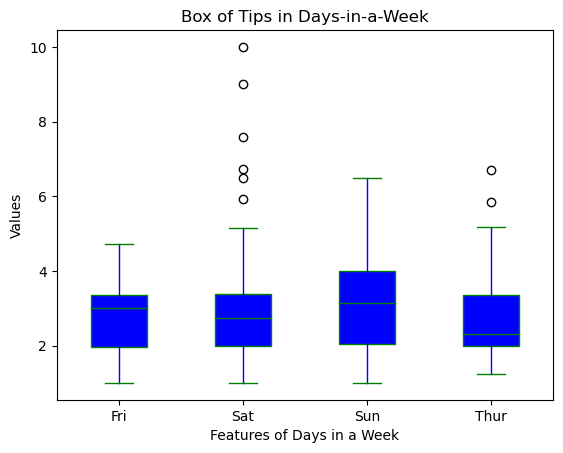

In [45]:
features, values = reshape_for_box(value_name = 'tip',
                                   dim = 'day',
                                   raw_data = data3)

#绘制箱式图
boxplot(  x_data = features
        , y_data = values
        , base_color = 'g'
        , median_color = 'b'
        , x_label = 'Features of Days'
        , y_label = 'Values'
        , title = 'Box of Tips in Days-in-a-Week')

#### 解释：周日的小费较多，但与其他天差异不大

### 小费在就餐时间上的差异

#### matplotlib方法 

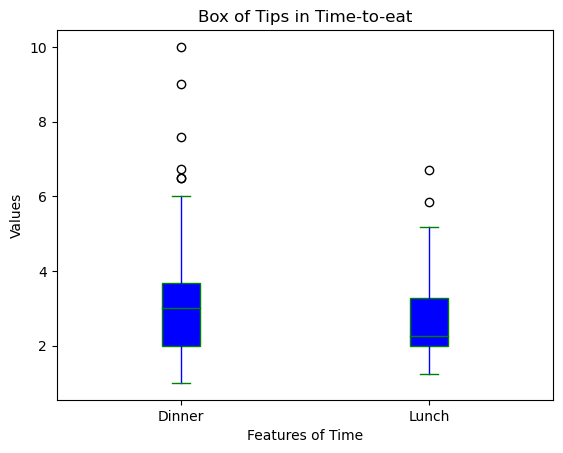

In [43]:
features, values = reshape_for_box(value_name = 'tip',
                                   dim = 'time',
                                   raw_data = data3)

#绘制箱式图
boxplot(  x_data = features
        , y_data = values
        , base_color = 'g'
        , median_color = 'b'
        , x_label = 'Features of Time'
        , y_label = 'Values'
        , title = 'Box of Tips in Time-to-eat')

#### 解释：午餐或晚餐的差异不大

### 小费在就餐人数上的差异

#### matplotlib方法 

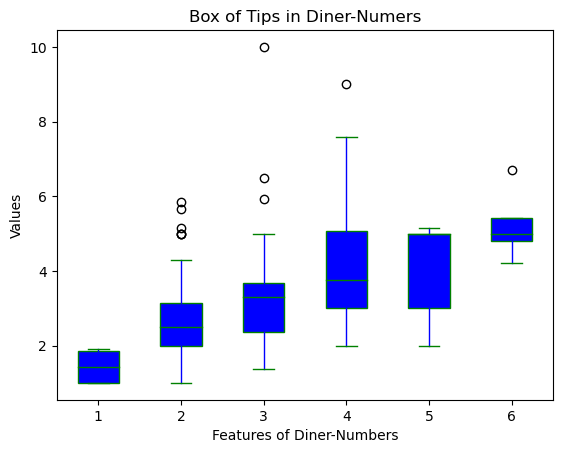

In [46]:
features, values = reshape_for_box(value_name = 'tip',
                                   dim = 'size',
                                   raw_data = data3)

#绘制箱式图
boxplot(  x_data = features
        , y_data = values
        , base_color = 'g'
        , median_color = 'b'
        , x_label = 'Features of Diner-Numbers'
        , y_label = 'Values'
        , title = 'Box of Tips in Diner-Numers')

#### 解释：随着就餐人数上升，小费数目有上升趋势

### 小费在性别与抽烟组合上的差异

#### matplotlib方法 

In [47]:
data3.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
data3['sex_smoker'] = data3[['sex','smoker']].apply(lambda x:str(x.sex)+'_'+str(x.smoker),axis = 1)

data3.head()

,total_bill,tip,sex,smoker,day,time,size,sex_smoker
0,16.99,1.01,Female,No,Sun,Dinner,2,Female_No
1,10.34,1.66,Male,No,Sun,Dinner,3,Male_No
2,21.01,3.50,Male,No,Sun,Dinner,3,Male_No
3,23.68,3.31,Male,No,Sun,Dinner,2,Male_No
4,24.59,3.61,Female,No,Sun,Dinner,4,Female_No


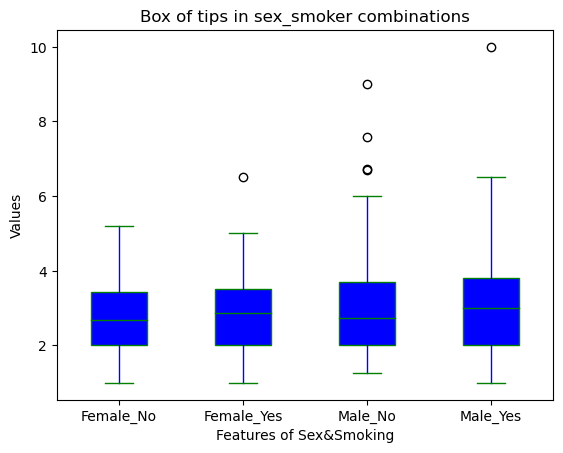

In [6]:
features, values = reshape_for_box(value_name = 'tip',
                                   dim = 'sex_smoker',
                                   raw_data = data3)

boxplot(  x_data = features
        , y_data = values
        , base_color = 'g'
        , median_color = 'b'
        , x_label = 'Features of Sex&Smoking'
        , y_label = 'Values'
        , title = 'Box of tips in sex_smoker combinations')

In [24]:
data3_bysexsmoke = data3[['tip','sex','smoker']].groupby(['sex','smoker']).mean()
data3_bysexsmoke = data3_bysexsmoke.unstack('smoker').reset_index()
data3_bysexsmoke.columns = ['Sex','Yes','No']
data3_bysexsmoke

,Sex,Yes,No
0,Male,3.051167,3.113402
1,Female,2.931515,2.773519


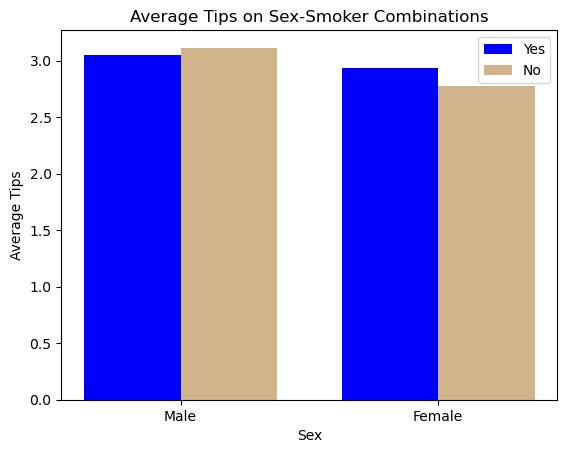

In [42]:
def groupedbarplot(x_groups, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 设置x轴上每组的中心位置
    group_locs = np.arange(0,len(y_data_list))
    # 设置每一组柱状图的宽度
    total_width = 0.75
    # 设置每一个柱状图的宽度
    ind_width = total_width / len(y_data_list)
    # 计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)

    # 分别绘制每一个柱状图
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.bar(group_locs + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    #添加刻度名称
    ax.set_xticks(group_locs,x_groups)
    ax.set_title(title)
    ax.legend(loc = 'upper right')

groupedbarplot(x_groups=['Male','Female'],
               y_data_list=[data3_bysexsmoke['Yes'],data3_bysexsmoke['No']],
               y_data_names=['Yes','No'],
               colors = ['b','tan'],
               x_label= 'Sex',
               y_label= 'Average Tips',
               title = 'Average Tips on Sex-Smoker Combinations'                 
              )

#### 解释：在男性中，不抽烟者的小费略多，而女性中则是抽烟者略多（基于平均数）

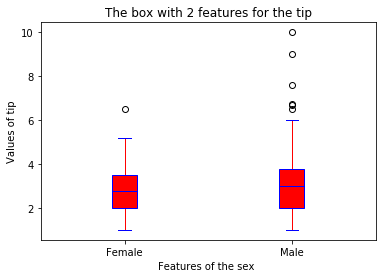

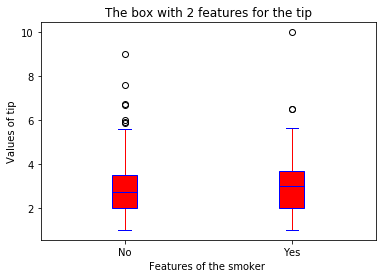

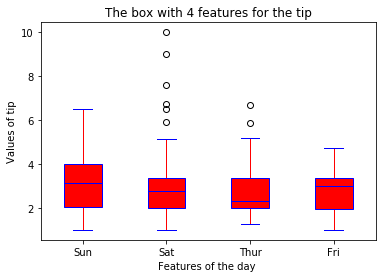

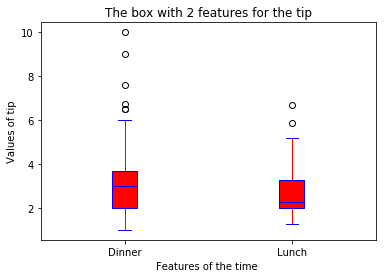

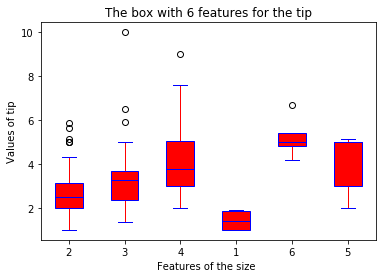

smoker       Yes        No
sex                       
Male    3.051167  3.113402
Female  2.931515  2.773519


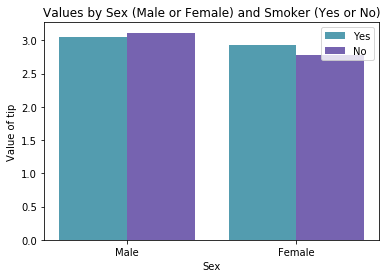

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

data4 = sns.load_dataset("titanic")
data4.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 不同仓位等级中的幸存比例

#### matplotlib方法

In [5]:
def stackedbarplot(x_groups, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 每组位置
    group_locs = np.arange(0,len(x_groups))
    print(group_locs)
    # 循环绘制堆积柱状图
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(group_locs, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            # 采用堆积的方式，除了第一个分类，后面的分类都从前一个分类的柱状图接着画
            # 用归一化保证最终累积结果为1，下面bottom参数表示纵向从哪里开始画
            ax.bar(group_locs, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_xticks(group_locs,x_groups)
    ax.set_title(title)
    ax.legend(loc = 'upper right') # 设定图例位置

In [6]:
data4_survbypc = data4.groupby(['pclass']).mean('survived')
data4_survbypc['victim'] = 1-data4_survbypc['survived'] 
data4_survbypc

,survived,age,sibsp,parch,fare,adult_male,alone,victim
pclass,,,,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687,0.550926,0.504630,0.370370
2,0.472826,29.877630,0.402174,0.380435,20.662183,0.538043,0.565217,0.527174
3,0.242363,25.140620,0.615071,0.393075,13.675550,0.649695,0.659878,0.757637


[0 1 2]


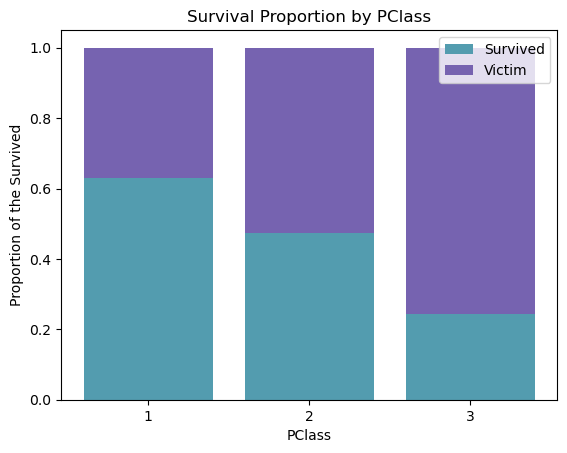

In [7]:
stackedbarplot(x_groups = data4_survbypc.index.values
               , y_data_list = [data4_survbypc['survived'],data4_survbypc['victim']]
               , y_data_names = ['Survived', 'Victim']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'PClass'
               , y_label = 'Proportion of the Survived'
               , title = 'Survival Proportion by PClass')

#### 解释：舱位等级的数字越小，则幸存比例越高

### 不同性别的幸存比例

#### matplotlib方法

In [8]:
data4_survbysex = data4.groupby(['sex']).mean('survived')
data4_survbysex['victim'] = 1-data4_survbysex['survived'] 
data4_survbysex

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,victim
sex,,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274,0.257962
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305,0.811092


[0 1]


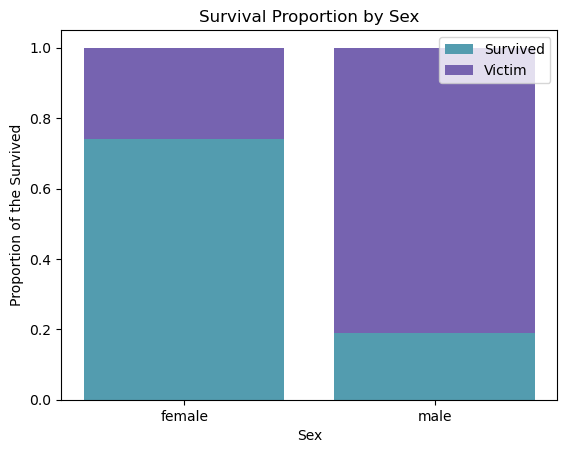

In [9]:
stackedbarplot(x_groups = data4_survbysex.index.values
               , y_data_list = [data4_survbysex['survived'],data4_survbysex['victim']]
               , y_data_names = ['Survived', 'Victim']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Sex'
               , y_label = 'Proportion of the Survived'
               , title = 'Survival Proportion by Sex')

#### 解释：男性幸存比例远远低于女性

### 幸存与遇难的票价分布

#### matplotlib方法

In [37]:
#打包一个方法，将DataFrame整形为适用于boxplot的格式
def reshape_for_box( raw_data, dim, value_name):
    #获取所需维度列的所有可能值，作为特征列表
    feature_list = np.unique(raw_data[dim])
    #利用列表，每个元素为对应特征的数组
    #此处不能直接用dataframe，因为各数组间的索引是无相关的
    new_df = []
    for feature in feature_list:
        #从原dataframe中取出所需value，并以特征过滤
        new_df.append(raw_data[value_name][raw_data[dim] == feature].dropna().values)
    return feature_list , new_df

# 定义箱型图的绘制方法
def boxplot(x_data, y_data, base_color, median_color, x_label, y_label, title):
    _, ax = plt.subplots()

    # 设置样式
    ax.boxplot(y_data
               # 箱子是否颜色填充
               , patch_artist = True
               # 中位数线颜色
               , medianprops = {'color': base_color}
               # 箱子颜色设置，color：边框颜色，facecolor：填充颜色
               , boxprops = {'color': base_color, 'facecolor': median_color}
               # 猫须颜色whisker
               , whiskerprops = {'color': median_color}
               # 猫须界限颜色whisker cap
               , capprops = {'color': base_color})

    # 箱图与x_data保持一致
    ax.set_xticklabels(x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

In [38]:
data4.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


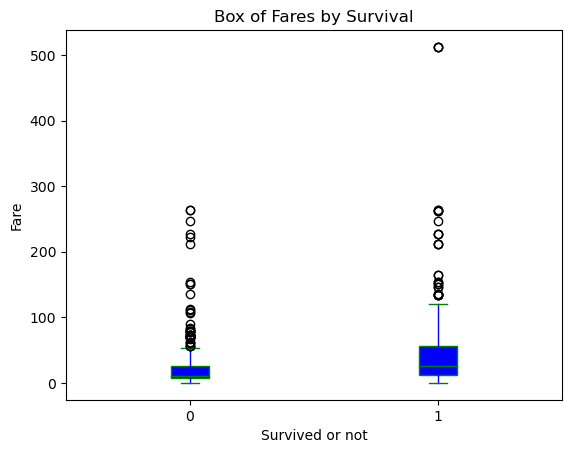

In [40]:
features, values = reshape_for_box(value_name = 'fare',
                                   dim = 'survived',
                                   raw_data = data4)

#绘制箱式图
boxplot(  x_data = features
        , y_data = values
        , base_color = 'g'
        , median_color = 'b'
        , x_label = 'Survived or not'
        , y_label = 'Fare'
        , title = 'Box of Fares by Survival')

#### 解释 幸存者的票价要稍高于遇难者

### 幸存与遇难的年龄分布

#### matplotlib方法

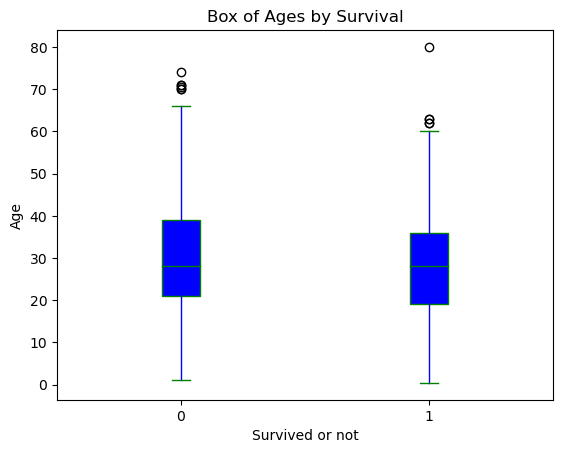

In [41]:
features, values = reshape_for_box(value_name = 'age',
                                   dim = 'survived',
                                   raw_data = data4)

#绘制箱式图
boxplot(  x_data = features
        , y_data = values
        , base_color = 'g'
        , median_color = 'b'
        , x_label = 'Survived or not'
        , y_label = 'Age'
        , title = 'Box of Ages by Survival')

#### 解释 幸存者和遇难者的年龄差异不大

### 不同港口的舱位等级分布

#### matplotlib方法

In [56]:
# 先后按照embarked和pclass分组，然后对survial计数，再利用透视
data4_pclassbyemb = data4.groupby(['embarked','pclass']).count()['survived'].unstack('pclass')
data4_pclassbyemb.columns = ['1','2','3']
data4_pclassbyemb

,1,2,3
embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


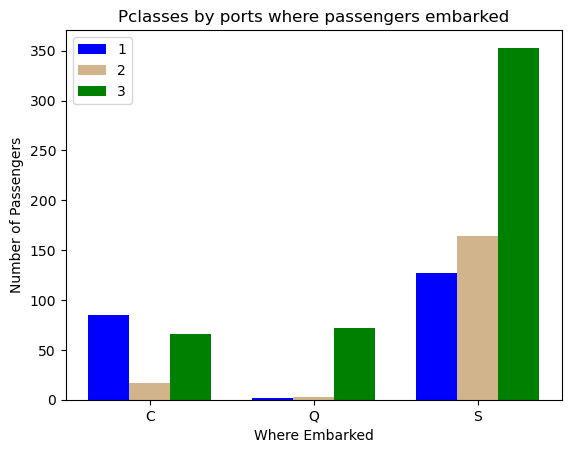

In [74]:
def groupedbarplot(x_groups, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 设置x轴上每组的中心位置
    group_locs = np.arange(0,len(y_data_list))
    # 设置每一组柱状图的宽度
    total_width = 0.75
    # 设置每一个柱状图的宽度
    ind_width = total_width / len(y_data_list)
    # 计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)

    # 分别绘制每一个柱状图
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.bar(group_locs + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    #添加刻度名称
    ax.set_xticks(group_locs,x_groups)
    ax.set_title(title)
    ax.legend(loc = 'upper left')

groupedbarplot(x_groups=data4_pclassbyemb.index.values,
               y_data_list=[data4_pclassbyemb['1'],data4_pclassbyemb['2'],data4_pclassbyemb['3']],
               y_data_names=['1','2','3'],
               colors = ['b','tan','g'],
               x_label= 'Where Embarked',
               y_label= 'Number of Passengers',
               title = 'Pclasses by ports where passengers embarked'                 
              )

#### 解释 C港主要是1级和3级，Q港主要是3级，S港登船人数最多，3级也最多

### 幸存与遇难乘客的堂表亲数量分布

#### matplotlib方法

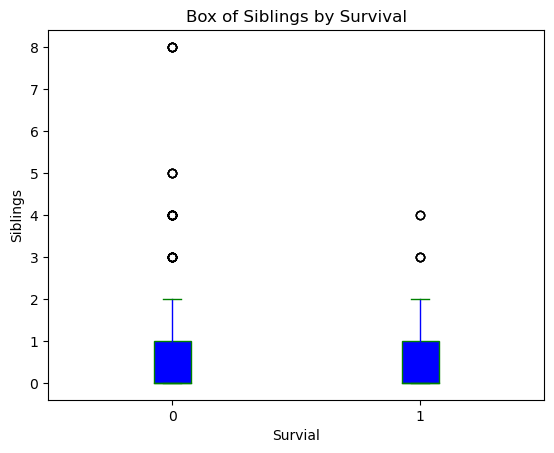

In [45]:
features, values = reshape_for_box(value_name = 'sibsp',
                                   dim = 'survived',
                                   raw_data = data4)

#绘制箱式图
boxplot(  x_data = features
        , y_data = values
        , base_color = 'g'
        , median_color = 'b'
        , x_label = 'Survial'
        , y_label = 'Siblings'
        , title = 'Box of Siblings by Survival')

#### 解释 堂兄弟姐妹的数目在幸存者与遇难者之间差别不大

### 幸存与遇难乘客的父母子女数量分布

#### matplotlib方法

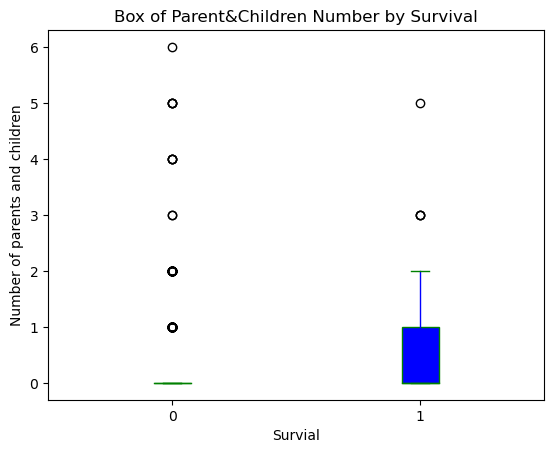

In [59]:
features, values = reshape_for_box(value_name = 'parch',
                                   dim = 'survived',
                                   raw_data = data4)

#绘制箱式图
boxplot(  x_data = features
        , y_data = values
        , base_color = 'g'
        , median_color = 'b'
        , x_label = 'Survial'
        , y_label = 'Number of parents and children'
        , title = 'Box of Parent&Children Number by Survival')

#### 解释：幸存者的父母子女数较多

### 单独乘船与幸存的关系

#### matplotlib方法

In [60]:
data4.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [69]:
data4_survbyalone = data4.groupby(['alone','survived']).count()
data4_survbyalone = data4_survbyalone['alive'].unstack('survived')
data4_survbyalone.columns = ['0','1']
data4_survbyalone

,0,1
alone,,
False,175,179
True,374,163


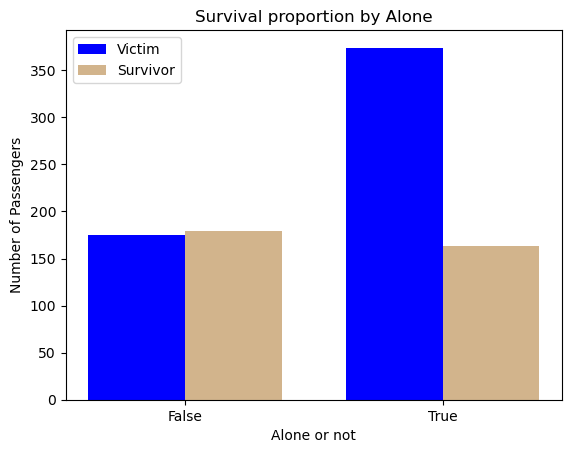

In [75]:
groupedbarplot(x_groups=data4_survbyalone.index.values,
               y_data_list=[data4_survbyalone['0'],data4_survbyalone['1']],
               y_data_names=['Victim','Survivor'],
               colors = ['b','tan','g'],
               x_label= 'Alone or not',
               y_label= 'Number of Passengers',
               title = 'Survival proportion by Alone'                 
              )

#### 解释：单独乘船者的罹难比例高于非单独乘船的人

        survived  unservived  total  survived_prop  unsurvived_prop
pclass                                                             
1            136         216    216       0.629630              1.0
2             87         184    184       0.472826              1.0
3            119         491    491       0.242363              1.0


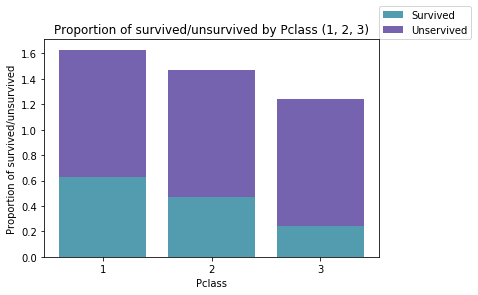

        survived  unservived  total  survived_prop  unsurvived_prop
sex                                                                
female       233         314    314       0.742038              1.0
male         109         577    577       0.188908              1.0


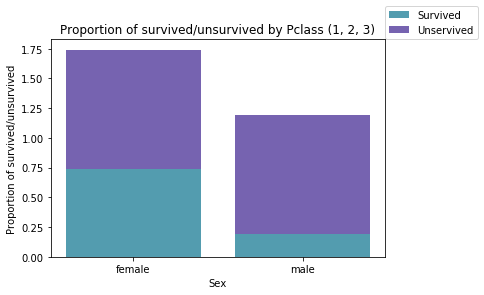

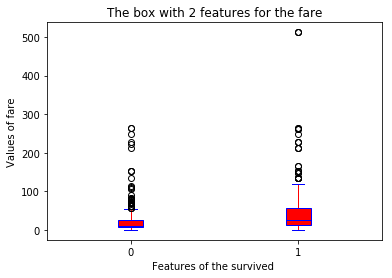

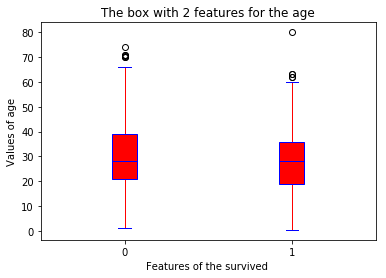

pclass      1    2    3
embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


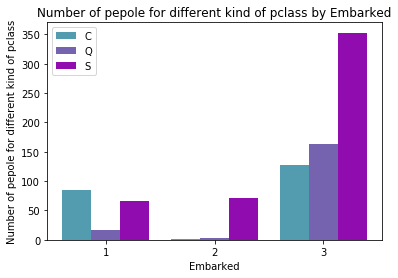

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

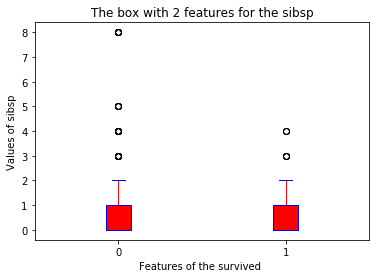

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

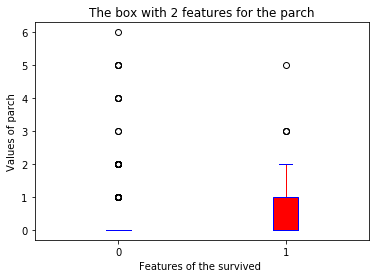

survived    0    1
alone             
False     175  179
True      374  163


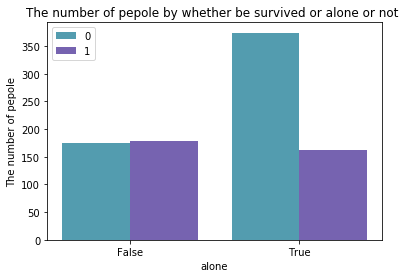